# EE798 HW3

In [1]:
from scipy.linalg import toeplitz, dft, inv, eigvals, eig, kron, eigh
from scipy.signal import convolve2d, convolve
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2
import matplotlib.pyplot as plt 
from skimage.data import camera 


## Q1 a

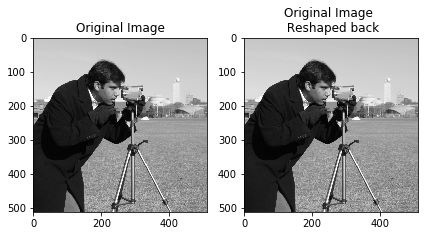

In [2]:
I = camera()
I_flatten = I.flatten(order="F")
I_back = np.reshape(I,(I.shape))
plt.subplot(1,2,1)
plt.imshow((I),cmap="gray")
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow((I_back),cmap="gray")
plt.title("Original Image \n Reshaped back")
plt.tight_layout()


# Q1 b

In [3]:
def cconv2(x:np.ndarray, y:np.ndarray,N1:int,N2:int):
    sizes = (N1,N2)
    return ifft2(np.multiply(fft2(x,sizes),fft2(y,sizes)))
    

### Tests

In [4]:
for _ in range(200):
    N1 = np.random.randint(1,5)
    N2 = np.random.randint(1,10)
    N3 = np.random.randint(1,20)
    x = np.random.randint(0,100,(N1,N1))
    y = np.random.randint(0,100,(N2,N3))
    cconv_size_1 = N1+N2-1
    cconv_size_2 = N1+N3-1
    res = convolve2d(x,y,mode="full")
    res2 = np.round(cconv2(x,y,cconv_size_1,cconv_size_2))
    assert np.sum(np.isclose(res,res2)) == res.size
print("All tests are success!")


All tests are success!


# Q1 c

In [5]:
def cconvmtx2(h:np.ndarray, image_shape, N1, N2):
    L1,L2 = image_shape
    H = np.empty((N1*N2,0))
    image_size = L1*L2
    for i in range(image_size):
        row = np.mod(i,L1)
        col = i//L1
        basis_vec = np.zeros((L1,L2))
        basis_vec[row,col] = 1
        basis_vec_output = cconv2(h,basis_vec,N1,N2)
        transformed_basis_vec = basis_vec_output.flatten(order="F")
        H = np.column_stack((H, transformed_basis_vec))
    return H 

In [6]:
for trial in range(50):
    
    P1 =  np.random.randint(1,3)
    P2 =  np.random.randint(1,3)
    N1 = np.random.randint(1,20)
    N2 = np.random.randint(1,20)
    L1 = np.random.randint(P1,60)
    L2 = np.random.randint(P2,60)

    
    h = np.random.randint(1,5,(P1,P2))
    test_image = np.random.randint(1,100,(L1,L2))
    res = cconv2(h,test_image, N1, N2)
    H = cconvmtx2(h, test_image.shape, N1, N2)
    res2 = np.reshape(H.dot(test_image.flatten(order="F")),(N1,N2),order="F")
    assert np.sum(np.isclose(res,res2)) == res.size
    
print("All tests are success!")

All tests are success!


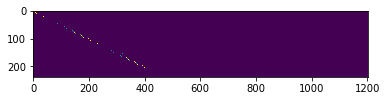

In [12]:
plt.imshow(np.real(H))